In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0)

In [4]:
make_blobs?

Signature: make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int, optional (default=100)
    The total number of points equally divided among clusters.

n_features : int, optional (default=2)
    The number of features for each sample.

centers : int or array of shape [n_centers, n_features], optional
    (default=3)
    The number of centers to generate, or the fixed center locations.

cluster_std : float or sequence of floats, optional (default=1.0)
    The standard deviation of the clusters.

center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
    The bounding box for each cluster center when centers are
    generated at random.

shuffle : boolean, optional (default=True)
    Shuffle the samples.

random_state : int, RandomState instanc

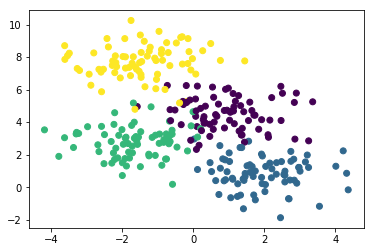

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [7]:
import tree_visualize as tv

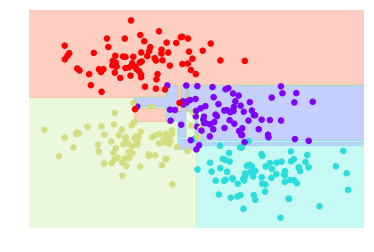

In [8]:
tv.visualize_classifier(DecisionTreeClassifier(), X, y)

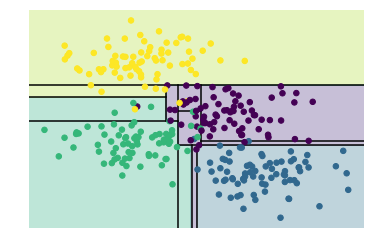

In [9]:
tv.plot_tree_interactive(X, y);

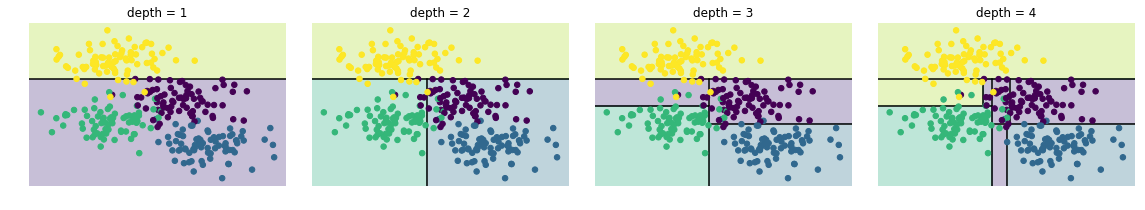

In [10]:
from tree_visualize import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

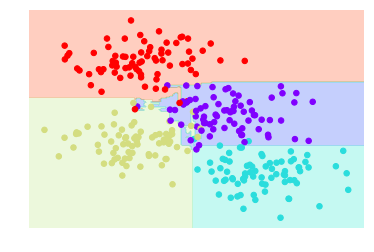

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from tree_visualize import visualize_classifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

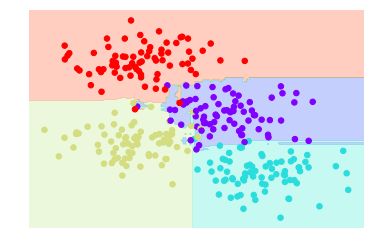

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

In [13]:
iris = pd.read_csv('iris.txt', header=None)

In [14]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.shape

(150, 5)

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1],random_state=42)

In [17]:
clf = DecisionTreeClassifier()
clf.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
y_clf = clf.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_clf)

1.0

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation, metrics
import matplotlib.pylab as plt

/home/ML/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ML/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
rf0 = RandomForestClassifier(random_state=10)
rf0.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [21]:
RandomForestClassifier?

Init signature: RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and use averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

criterion : string, optional (default="gini")
    The function to measure the quality o

In [22]:
train = pd.read_csv('train_modified.csv')
train.head()

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0,0.0,ID000002C20,300000,5,20000,1,0,37,1,...,0,0,0,0,1,1,0,1,0,0
1,0,0.0,ID000004E40,200000,2,35000,3,13,30,0,...,0,0,0,0,1,0,1,1,0,0
2,0,0.0,ID000007H20,600000,4,22500,1,0,34,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0.0,ID000008I30,1000000,5,35000,3,10,28,1,...,0,0,0,0,0,0,1,0,0,1
4,0,25000.0,ID000009J40,500000,2,100000,3,17,31,1,...,0,0,0,0,0,0,1,0,0,1


In [23]:
train.shape

(20000, 51)

In [24]:
target='Disbursed' 
IDcol = 'ID'
train['Disbursed'].value_counts() 

0    19680
1      320
Name: Disbursed, dtype: int64

In [25]:
x_columns = [x for x in train.columns if x not in [target, IDcol]]
X = train[x_columns]
y = train['Disbursed']

In [26]:
x_columns

['Existing_EMI',
 'Loan_Amount_Applied',
 'Loan_Tenure_Applied',
 'Monthly_Income',
 'Var4',
 'Var5',
 'Age',
 'EMI_Loan_Submitted_Missing',
 'Interest_Rate_Missing',
 'Loan_Amount_Submitted_Missing',
 'Loan_Tenure_Submitted_Missing',
 'Processing_Fee_Missing',
 'Device_Type_0',
 'Device_Type_1',
 'Filled_Form_0',
 'Filled_Form_1',
 'Gender_0',
 'Gender_1',
 'Var1_0',
 'Var1_1',
 'Var1_2',
 'Var1_3',
 'Var1_4',
 'Var1_5',
 'Var1_6',
 'Var1_7',
 'Var1_8',
 'Var1_9',
 'Var1_10',
 'Var1_11',
 'Var1_12',
 'Var1_13',
 'Var1_14',
 'Var1_15',
 'Var1_16',
 'Var1_17',
 'Var1_18',
 'Var2_0',
 'Var2_1',
 'Var2_2',
 'Var2_3',
 'Var2_4',
 'Var2_5',
 'Var2_6',
 'Mobile_Verified_0',
 'Mobile_Verified_1',
 'Source_0',
 'Source_1',
 'Source_2']

In [27]:
rf0 = RandomForestClassifier(oob_score=True, random_state=10,class_weight={0: 1, 1: 50})
rf0.fit(X,y)

/home/ML/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ML/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 50},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False)

In [28]:
rf0.oob_score_

0.9805

In [29]:
y_predprob = rf0.predict_proba(X)[:,1]
metrics.roc_auc_score(y, y_predprob)

0.9997059197154472

In [30]:
param_test1 = {'n_estimators':list(range(10,71,10))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)

In [31]:
GridSearchCV?

Init signature: GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise')
Docstring:     
Exhaustive search over specified parameter values for an estimator.

.. deprecated:: 0.18
    This module will be removed in 0.20.
    Use :class:`sklearn.model_selection.GridSearchCV` instead.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    A object of that type is instantiated for each grid point.
    This is assumed to implement the scikit-learn estimator interface.

In [32]:
gsearch1.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [33]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.80681, std: 0.02236, params: {'n_estimators': 10},
  mean: 0.81600, std: 0.03275, params: {'n_estimators': 20},
  mean: 0.81818, std: 0.03136, params: {'n_estimators': 30},
  mean: 0.81838, std: 0.03118, params: {'n_estimators': 40},
  mean: 0.82034, std: 0.03001, params: {'n_estimators': 50},
  mean: 0.82113, std: 0.02966, params: {'n_estimators': 60},
  mean: 0.81992, std: 0.02836, params: {'n_estimators': 70}],
 {'n_estimators': 60},
 0.8211334476626017)

In [34]:
param_test2 = {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(50,201,20))}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60, min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 13], 'min_samples_split': [50, 70, 90, 110, 130, 150, 170, 190]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [35]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 13, 'min_samples_split': 110}, 0.8242016800050813)

In [36]:
rf1 = RandomForestClassifier(n_estimators= 60, max_depth=13, min_samples_split=110, min_samples_leaf=20,max_features='sqrt',oob_score=True, random_state=10, class_weight={0: 1, 1: 50})
rf1.fit(X,y)
rf1.oob_score_

0.86425

In [37]:
y_pre = rf1.predict(X)

In [38]:
res = (rf1.predict(X) == y)

In [39]:
rein = res[res == False].index

In [40]:
rein

Int64Index([    4,     8,    34,    35,    38,    40,    44,    49,    88,
               92,
            ...
            19932, 19947, 19948, 19949, 19954, 19958, 19962, 19970, 19985,
            19993],
           dtype='int64', length=2410)

In [41]:
train.iloc[rein, 0].value_counts()

0    2362
1      48
Name: Disbursed, dtype: int64

In [42]:
from sklearn.metrics import recall_score

In [43]:
recall_score(y, y_pre, average='macro')  

0.864989837398374

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

In [9]:
RandomForestClassifier?

Init signature: RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and use averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

criterion : string, optional (default="gini")
    The function to measure the quality o